In [69]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import FunctionTransformer , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [70]:
train = "train.csv"
df_train = pd.read_csv(train)

In [71]:
data_train=pd.read_csv(train)

<Axes: ylabel='count'>

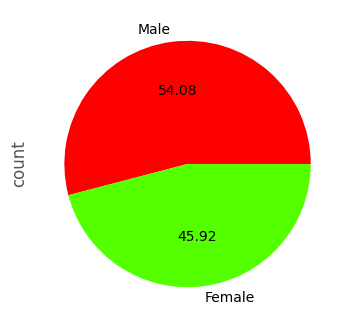

In [72]:
data_train["Gender"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "prism")

In [73]:
data_train["Gender"] = np.where(data_train["Gender"] == "Male" , 1 , 0)

#### Age

Age is a significant factor that affects insurance rates for vehicles. Younger drivers, especially those under the age of  25
 , typically have higher insurance rates because they are considered more risky to insure. Older drivers, on the other hand, may be eligible for lower insurance rates due to their experience and history of safe driving.

<Axes: xlabel='Age', ylabel='Density'>

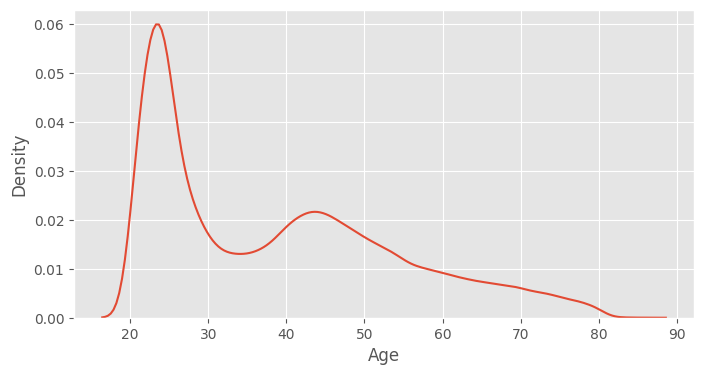

In [74]:
sns.kdeplot(data_train["Age"])

#### Driving License

Holding a valid driving license can positively affect the cost of insurance premiums for a vehicle. Drivers with a license are considered less of a risk to insurance companies, as they have demonstrated knowledge of traffic rules and basic driving skills. On the other hand, drivers without a license or with a history of traffic violations may face higher insurance rates due to the perceived higher risk of accidents or traffic violations.

<Axes: ylabel='count'>

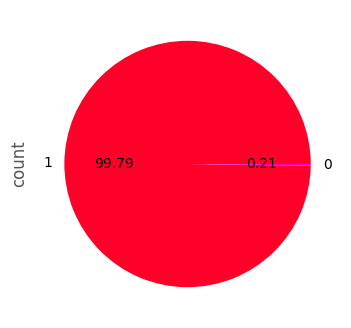

In [75]:
data_train["Driving_License"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

#### Region Code

<Axes: xlabel='Region_Code', ylabel='Density'>

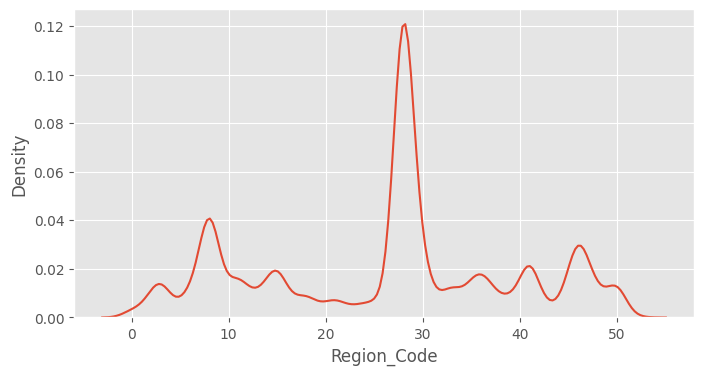

In [76]:
sns.kdeplot(data_train["Region_Code"])

#### Previously Insured

If previously insured, it may indicate a responsible driving history which could result in lower insurance premiums. On the other hand, if a person has a history of accidents or claims, their previous insurance may affect their ability to obtain coverage or the cost of their premiums. Ultimately, a person's previous insurance history is one of many factors that can impact their insurance rates and eligibility for coverage.

<Axes: ylabel='count'>

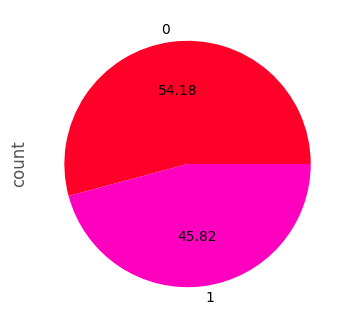

In [77]:
data_train["Previously_Insured"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

#### Vehicle age
Vehicle age can have a significant impact on insurance premiums. As vehicles get older, their value decreases and the cost of repairs may increase, leading to higher premiums. Older vehicles may also be considered more of a risk to insure due to their potential for mechanical issues or safety concerns.

<Axes: ylabel='count'>

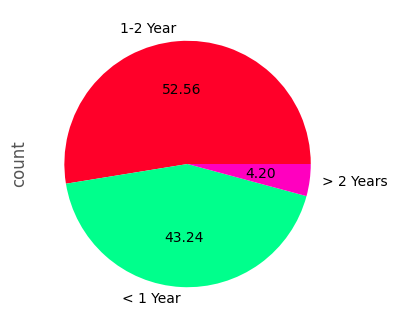

In [78]:
data_train["Vehicle_Age"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

#### Vehicle damage
Vehicle damage can significantly affect insurance premiums, especially if the driver is at fault for the accident. Insurance companies use the severity and frequency of past accidents to assess the risk of insuring a driver, and a history of vehicle damage can indicate a higher risk. In some cases, insurance coverage may also be denied or canceled due to repeated vehicle damage claims.

<Axes: ylabel='count'>

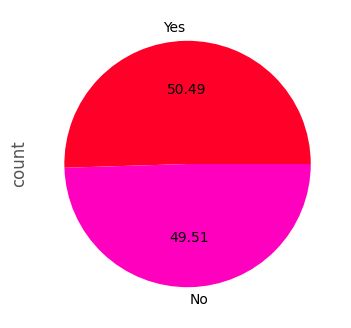

In [79]:
data_train["Vehicle_Damage"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

In [80]:
data_train["Vehicle_Damage"] = np.where(data_train["Vehicle_Damage"] == "Yes" , 1 , 0)

#### Annual_Premium
The annual premium of vehicle insurance can indirectly impact healthcare insurance by affecting a person's overall financial health. If a person's vehicle insurance premium is high, they may have less disposable income to allocate towards healthcare expenses or insurance premiums. This could lead to individuals forgoing or reducing their healthcare coverage, which could ultimately impact their health and well-being.

<Axes: xlabel='Annual_Premium', ylabel='Density'>

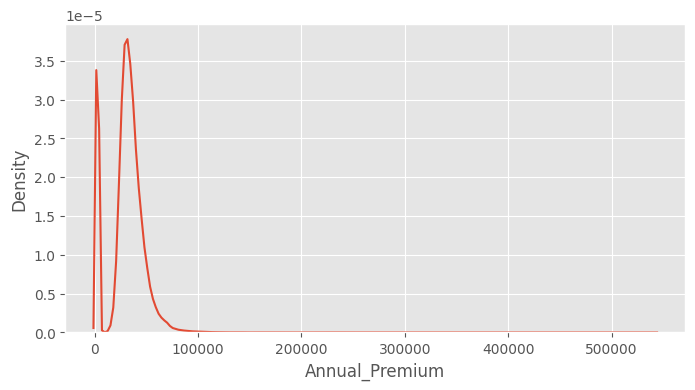

In [81]:
sns.kdeplot(data_train["Annual_Premium"])

#### Vintage
The length of time a customer has been associated with a healthcare insurance company can have a significant impact on their overall health care coverage. As customers continue to stay with the same healthcare insurance provider, they may receive additional benefits, such as lower premiums, better coverage, and access to more health care services. Furthermore, long-term customers may also have a higher likelihood of receiving personalized attention and support from the insurance company, leading to better health outcomes and overall satisfaction with their coverage.

<Axes: xlabel='Vintage', ylabel='Density'>

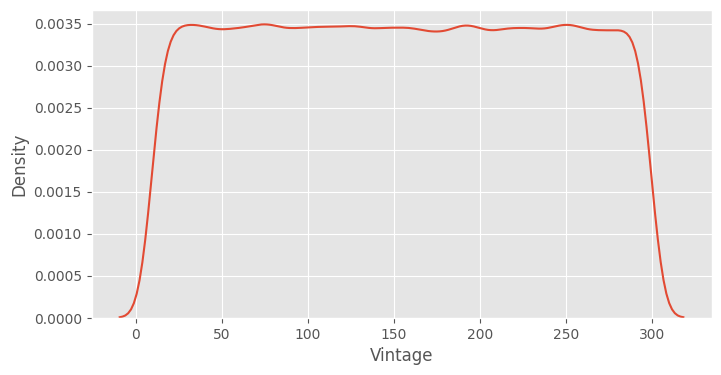

In [82]:
sns.kdeplot(data_train["Vintage"])

In [83]:
data_train = pd.concat([pd.get_dummies(data_train["Vehicle_Age"]) ,
                 data_train.drop("Vehicle_Age" , axis = 1)] ,
                axis = 1 , join = "inner")

In [84]:
data_train

,1-2 Year,< 1 Year,> 2 Years,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,False,False,True,1,1,44,1,28.0,0,1,40454.0,26.0,217,1
1,True,False,False,2,1,76,1,3.0,0,0,33536.0,26.0,183,0
2,False,False,True,3,1,47,1,28.0,0,1,38294.0,26.0,27,1
3,False,True,False,4,1,21,1,11.0,1,0,28619.0,152.0,203,0
4,False,True,False,5,0,29,1,41.0,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,True,False,False,381105,1,74,1,26.0,1,0,30170.0,26.0,88,0
381105,False,True,False,381106,1,30,1,37.0,1,0,40016.0,152.0,131,0
381106,False,True,False,381107,1,21,1,30.0,1,0,35118.0,160.0,161,0
381107,False,False,True,381108,0,68,1,14.0,0,1,44617.0,124.0,74,0


In [85]:
def stat_parity(preds, sens):
    prob_a = np.sum((preds == 1) & (sens == 0)) / np.sum(sens == 0)
    prob_b = np.sum((preds == 1) & (sens == 1)) / np.sum(sens == 1)
    stat_p = prob_a - prob_b
    return stat_p


def eq_oppo(preds, sens, labels):
    preds = np.array(preds)
    sens = np.array(sens)
    labels = np.array(labels)
    positive_label = 1
    tpr_a = np.sum((preds[sens == 0] == positive_label) & (labels[sens == 0] == positive_label)) / np.sum(labels == positive_label)
    tpr_b = np.sum((preds[sens == 1] == positive_label) & (labels[sens == 1] == positive_label)) / np.sum(labels == positive_label)
    equal_opportunity = tpr_a - tpr_b

    return equal_opportunity


In [86]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

def process_dfs(df_train, df_test, categ_cols):
    combined_df = pd.concat([df_train, df_test], ignore_index=True)
    numerical_cols = []
    for col in combined_df.columns:
        if col not in categ_cols:
            numerical_cols.append(col)
    scaler = MinMaxScaler()
    combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])
    combined_df = pd.get_dummies(combined_df, columns=categ_cols, drop_first=True)
    combined_df = combined_df.replace({True: 1, False: 0})

    train_x = combined_df.iloc[:len(df_train)].values
    test_x = combined_df.iloc[len(df_train):].values

    return train_x, test_x

In [87]:
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [88]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [89]:
df_train['Gender']=df_train['Gender'].map({'Female':0,'Male':1})
df_train['Vehicle_Age']=df_train['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1,'> 2 Years':2})
df_train['Vehicle_Damage']=df_train['Vehicle_Damage'].map({'No':0,'Yes':1})

In [90]:
df_train['Age'] = df_train['Age'].apply(lambda x: 1 if x>=35 else 0)

In [91]:
df_train['Policy_Sales_Channel'] = df_train['Policy_Sales_Channel'].apply(lambda x: 1 if x>=112.034295 else 0)

In [92]:
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,1,1,28.0,0,2,1,40454.0,0,217,1
1,2,1,1,1,3.0,0,1,0,33536.0,0,183,0
2,3,1,1,1,28.0,0,2,1,38294.0,0,27,1
3,4,1,0,1,11.0,1,0,0,28619.0,1,203,0
4,5,0,0,1,41.0,1,0,0,27496.0,1,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,1,1,26.0,1,1,0,30170.0,0,88,0
381105,381106,1,0,1,37.0,1,0,0,40016.0,1,131,0
381106,381107,1,0,1,30.0,1,0,0,35118.0,1,161,0
381107,381108,0,1,1,14.0,0,2,1,44617.0,1,74,0


In [93]:
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,1,1,28.0,0,2,1,40454.0,0,217,1
1,2,1,1,1,3.0,0,1,0,33536.0,0,183,0
2,3,1,1,1,28.0,0,2,1,38294.0,0,27,1
3,4,1,0,1,11.0,1,0,0,28619.0,1,203,0
4,5,0,0,1,41.0,1,0,0,27496.0,1,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,1,1,26.0,1,1,0,30170.0,0,88,0
381105,381106,1,0,1,37.0,1,0,0,40016.0,1,131,0
381106,381107,1,0,1,30.0,1,0,0,35118.0,1,161,0
381107,381108,0,1,1,14.0,0,2,1,44617.0,1,74,0


In [94]:
len(df_train)

381109

([<matplotlib.patches.Wedge at 0x7ebd23199510>,
 [Text(-1.1121382173768593, 0.4507200743807865, 'Not interested in insurance'),
  Text(1.2048164021582641, -0.4882800805791856, 'Interested in insurance')],
 [Text(-0.6487472934698346, 0.2629200433887921, '87.7%'),
  Text(0.7414254782512395, -0.3004800495871911, '12.3%')])

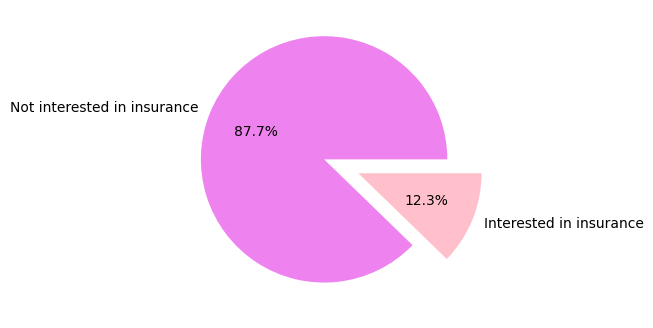

In [95]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(6,4)
classimb=df_train['Response'].value_counts()
plt.pie(classimb,labels=['Not interested in insurance','Interested in insurance'],autopct="%0.1f%%",explode=[0.1,0.2],radius=1,colors=['violet','pink'])

In [96]:
df_train_nosmote=df_train

In [97]:
import imblearn
from imblearn.over_sampling import SMOTE
def pre(dataframe):
    x = dataframe.drop("Response" , axis = 1)
    y = dataframe["Response"]

    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(x, y)
    return X_train_smote , y_train_smote

In [98]:
x,y=pre(df_train)

In [99]:
x.shape

(668798, 11)

In [100]:
y.shape

(668798,)

In [101]:
df_train=pd.concat([x,y],axis=1)
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,1,1,28.000000,0,2,1,40454.000000,0,217,1
1,2,1,1,1,3.000000,0,1,0,33536.000000,0,183,0
2,3,1,1,1,28.000000,0,2,1,38294.000000,0,27,1
3,4,1,0,1,11.000000,1,0,0,28619.000000,1,203,0
4,5,0,0,1,41.000000,1,0,0,27496.000000,1,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
668793,39021,1,1,1,28.000000,0,1,1,36443.608568,0,221,1
668794,306728,1,1,1,29.120770,0,1,1,25365.038246,1,157,1
668795,268487,0,1,1,28.000000,0,1,1,54390.112238,0,64,1
668796,125359,0,0,1,32.876533,0,0,1,27119.884978,0,120,1


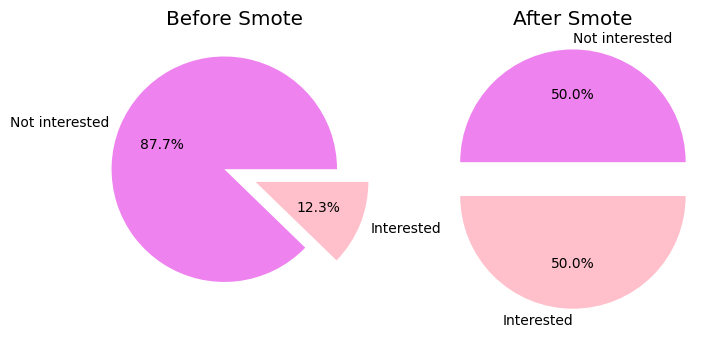

In [102]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 4)

plt.subplot(1, 2, 1)

classimb = data_train['Response'].value_counts()
plt.pie(classimb, labels=['Not interested', 'Interested'],
        autopct="%0.1f%%", explode=[0.1, 0.2], radius=1, colors=['violet', 'pink'])
plt.title('Before Smote')


plt.subplot(1, 2, 2)


classimb = df_train['Response'].value_counts()
plt.pie(classimb, labels=['Not interested', 'Interested'],
        autopct="%0.1f%%", explode=[0.1, 0.2], radius=1, colors=['violet', 'pink'])
plt.title('After Smote')


plt.show()


In [103]:
df_train_fin,df_test_fin=np.split(df_train.sample(frac = 1) , [int(0.8 * len(df_train))])

In [104]:
df_train_fin

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
91400,91401,0,0,1,29.000000,1,0,0,36683.000000,1,134,0
53377,53378,0,0,1,46.000000,1,0,0,20131.000000,1,289,0
237003,237004,1,1,1,28.000000,0,1,1,2630.000000,1,85,0
432144,199492,1,1,1,37.525843,0,1,1,34956.691537,0,234,1
29162,29163,1,1,1,8.000000,1,1,0,48751.000000,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
150557,150558,0,0,1,40.000000,0,1,1,31933.000000,1,167,0
311708,311709,1,1,1,50.000000,0,1,1,2630.000000,1,110,0
210039,210040,0,0,1,3.000000,0,0,1,20026.000000,0,192,0
126459,126460,0,1,1,0.000000,1,1,0,2630.000000,0,243,0


In [105]:
df_test_fin

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
175585,175586,1,0,1,11.000000,1,0,0,35285.000000,1,149,0
586727,239456,0,0,1,42.343727,0,1,1,28049.130932,1,253,1
409965,169881,1,0,1,32.757668,0,1,1,28634.092407,1,139,1
272327,272328,0,0,1,30.000000,0,0,1,32694.000000,1,112,0
185246,185247,0,0,1,28.000000,0,0,1,28244.000000,1,174,1
...,...,...,...,...,...,...,...,...,...,...,...,...
62636,62637,0,0,1,18.000000,0,0,1,2630.000000,1,113,1
572159,22894,1,0,1,28.000000,0,0,1,47298.696348,0,56,1
168487,168488,0,1,1,28.000000,0,1,1,2630.000000,0,48,0
225986,225987,0,0,1,36.000000,1,0,0,34184.000000,1,237,0


### Without smote

In [106]:
df_train_fin_nosmote,df_test_fin_nosmote=np.split(df_train.sample(frac = 1) , [int(0.8 * len(df_train))])

In [107]:
df_train_x_adult = df_train_fin_nosmote.iloc[:, :-1]
df_train_y_adult = df_train_fin_nosmote.iloc[:, -1]
df_test_x_adult = df_test_fin_nosmote.iloc[:, :-1]
df_test_y_adult = df_test_fin_nosmote.iloc[:, -1]
df_test_sens_adult = df_test_fin_nosmote['Gender']

train_x_adult, test_x_adult = process_dfs(df_train_x_adult, df_test_x_adult,
                                                   [])
train_y_adult = df_train_y_adult.values
test_y_adult = df_test_y_adult.values
test_sens_adult = df_test_sens_adult.values
print(train_x_adult.shape, test_x_adult.shape, train_y_adult.shape, test_y_adult.shape)

(535038, 11) (133760, 11) (535038,) (133760,)


In [108]:
from sklearn.linear_model import LogisticRegression
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}
clf = xgb.XGBRegressor(**params)

model_adult = LogisticRegression(random_state=42,max_iter=10000)
RFC = RandomForestClassifier()

model_adult.fit(train_x_adult, train_y_adult)
preds_adult = model_adult.predict(test_x_adult)

RFC.fit(train_x_adult, train_y_adult)
preds_RFC=RFC.predict(test_x_adult)

clf.fit(train_x_adult, train_y_adult)

y_pred_clf=clf.predict(test_x_adult)
preds_SVM=np.array([round(value) for value in y_pred_clf])


# report acc and two fairness metrics.
from sklearn.metrics import accuracy_score
print("For Logistic Regression: ")
acc_LR = accuracy_score(test_y_adult, preds_adult)
stat_p_LR = stat_parity(preds_adult, test_sens_adult)
eq_op_LR = eq_oppo(preds_adult, test_sens_adult, test_y_adult)
print(acc_LR, stat_p_LR, eq_op_LR)

print("\n For Random Forest: ")
acc_RFC = accuracy_score(test_y_adult, preds_RFC)
stat_p_RFC = stat_parity(preds_RFC, test_sens_adult)
eq_op_RFC = eq_oppo(preds_RFC, test_sens_adult, test_y_adult)
print(acc_RFC, stat_p_RFC, eq_op_RFC)

print("\n For XGBoost: ")
acc_SVM = accuracy_score(test_y_adult, preds_SVM)
stat_p_SVM = stat_parity(preds_SVM, test_sens_adult)
eq_op_SVM = eq_oppo(preds_SVM, test_sens_adult, test_y_adult)
print(acc_SVM, stat_p_SVM, eq_op_SVM)


For Logistic Regression: 
0.7840236244019139 0.22562333083003294 0.26643505747983365

 For Random Forest: 
0.8733403110047847 0.15028046022354657 0.2154860065307826

 For XGBoost: 
0.839683014354067 0.1711049697004542 0.22890542293527372


no gender

In [109]:
df_train_x_no_sens_adult = df_train_x_adult.drop('Gender',axis=1)
df_test_x_no_sens_adult = df_test_x_adult.drop('Gender',axis=1)


train_x_adult, test_x_adult = process_dfs(df_train_x_no_sens_adult, df_test_x_no_sens_adult,
                                                   [])



In [110]:
from sklearn.linear_model import LogisticRegression

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}
clf = xgb.XGBRegressor(**params)

model_adult = LogisticRegression(random_state=42,max_iter=10000)
RFC = RandomForestClassifier()

model_adult.fit(train_x_adult, train_y_adult)
preds_adult = model_adult.predict(test_x_adult)

RFC.fit(train_x_adult, train_y_adult)
preds_RFC=RFC.predict(test_x_adult)

clf.fit(train_x_adult, train_y_adult)

y_pred_clf=clf.predict(test_x_adult)
preds_SVM=np.array([round(value) for value in y_pred_clf])


# report acc and two fairness metrics.
from sklearn.metrics import accuracy_score
print("For Logistic Regression: ")
acc_LR_no_gender = accuracy_score(test_y_adult, preds_adult)
stat_p_LR_no_gender = stat_parity(preds_adult, test_sens_adult)
eq_op_LR_no_gender = eq_oppo(preds_adult, test_sens_adult, test_y_adult)
print(acc_LR_no_gender, stat_p_LR_no_gender, eq_op_LR_no_gender)

print("\n For Random Forest: ")
acc_RFC_no_gender = accuracy_score(test_y_adult, preds_RFC)
stat_p_RFC_no_gender = stat_parity(preds_RFC, test_sens_adult)
eq_op_RFC_no_gender = eq_oppo(preds_RFC, test_sens_adult, test_y_adult)
print(acc_RFC_no_gender, stat_p_RFC_no_gender, eq_op_RFC_no_gender)

print("\n For XGBoost: ")
acc_SVM_no_gender = accuracy_score(test_y_adult, preds_SVM)
stat_p_SVM_no_gender = stat_parity(preds_SVM, test_sens_adult)
eq_op_SVM_no_gender = eq_oppo(preds_SVM, test_sens_adult, test_y_adult)
print(acc_SVM_no_gender, stat_p_SVM_no_gender, eq_op_SVM_no_gender)


For Logistic Regression: 
0.7736019736842106 0.04443577638808005 0.174556786497085

 For Random Forest: 
0.8757401315789474 0.10073530350066878 0.19329923807535748

 For XGBoost: 
0.8375897129186602 0.08235739492422733 0.1901680409143095


no age

In [111]:
df_train_x_adult = df_train_fin_nosmote.iloc[:, :-1]
df_train_y_adult = df_train_fin_nosmote.iloc[:, -1]
df_test_x_adult = df_test_fin_nosmote.iloc[:, :-1]
df_test_y_adult = df_test_fin_nosmote.iloc[:, -1]
df_test_sens_adult = df_test_fin_nosmote['Age']

train_x_adult, test_x_adult = process_dfs(df_train_x_adult, df_test_x_adult,
                                                   [])
train_y_adult = df_train_y_adult.values
test_y_adult = df_test_y_adult.values
test_sens_adult = df_test_sens_adult.values
print(train_x_adult.shape, test_x_adult.shape, train_y_adult.shape, test_y_adult.shape)

(535038, 11) (133760, 11) (535038,) (133760,)


In [112]:
df_train_x_no_sens_adult = df_train_x_adult.drop('Age',axis=1)
df_test_x_no_sens_adult = df_test_x_adult.drop('Age',axis=1)


train_x_adult, test_x_adult = process_dfs(df_train_x_no_sens_adult, df_test_x_no_sens_adult,
                                                   [])



In [113]:
from sklearn.linear_model import LogisticRegression

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}
clf = xgb.XGBRegressor(**params)

model_adult = LogisticRegression(random_state=42,max_iter=10000)
RFC = RandomForestClassifier()

model_adult.fit(train_x_adult, train_y_adult)
preds_adult = model_adult.predict(test_x_adult)

RFC.fit(train_x_adult, train_y_adult)
preds_RFC=RFC.predict(test_x_adult)

clf.fit(train_x_adult, train_y_adult)

y_pred_clf=clf.predict(test_x_adult)
preds_SVM=np.array([round(value) for value in y_pred_clf])


# report acc and two fairness metrics.
from sklearn.metrics import accuracy_score
print("For Logistic Regression: ")
acc_LR_no_age = accuracy_score(test_y_adult, preds_adult)
stat_p_LR_no_age = stat_parity(preds_adult, test_sens_adult)
eq_op_LR_no_age = eq_oppo(preds_adult, test_sens_adult, test_y_adult)
print(acc_LR_no_age, stat_p_LR_no_age, eq_op_LR_no_age)

print("\n For Random Forest: ")
acc_RFC_no_age = accuracy_score(test_y_adult, preds_RFC)
stat_p_RFC_no_age = stat_parity(preds_RFC, test_sens_adult)
eq_op_RFC_no_age = eq_oppo(preds_RFC, test_sens_adult, test_y_adult)
print(acc_RFC_no_age, stat_p_RFC_no_age, eq_op_RFC_no_age)

print("\n For XGBoost: ")
acc_SVM_no_age = accuracy_score(test_y_adult, preds_SVM)
stat_p_SVM_no_age = stat_parity(preds_SVM, test_sens_adult)
eq_op_SVM_no_age = eq_oppo(preds_SVM, test_sens_adult, test_y_adult)
print(acc_SVM_no_age, stat_p_SVM_no_age, eq_op_SVM_no_age)


For Logistic Regression: 
0.7749775717703349 -0.12148001344512183 -0.1714703207240521

 For Random Forest: 
0.8729964114832536 -0.1613565462489634 -0.18287682466786942

 For XGBoost: 
0.8367598684210527 -0.1786719150893945 -0.19146525116674373


### With smote

No Gender

In [114]:
df_train_x_adult = df_train_fin.iloc[:, :-1]
df_train_y_adult = df_train_fin.iloc[:, -1]
df_test_x_adult = df_test_fin.iloc[:, :-1]
df_test_y_adult = df_test_fin.iloc[:, -1]
df_test_sens_adult = df_test_fin['Gender']

train_x_adult, test_x_adult = process_dfs(df_train_x_adult, df_test_x_adult,
                                                   [])
train_y_adult = df_train_y_adult.values
test_y_adult = df_test_y_adult.values
test_sens_adult = df_test_sens_adult.values
print(train_x_adult.shape, test_x_adult.shape, train_y_adult.shape, test_y_adult.shape)

(535038, 11) (133760, 11) (535038,) (133760,)


In [115]:
from sklearn.linear_model import LogisticRegression
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}
clf = xgb.XGBRegressor(**params)

model_adult = LogisticRegression(random_state=42,max_iter=10000)
RFC = RandomForestClassifier()
model_adult.fit(train_x_adult, train_y_adult)
preds_adult = model_adult.predict(test_x_adult)

RFC.fit(train_x_adult, train_y_adult)
preds_RFC=RFC.predict(test_x_adult)

clf.fit(train_x_adult, train_y_adult)

y_pred_clf=clf.predict(test_x_adult)
preds_SVM=np.array([round(value) for value in y_pred_clf])


# report acc and two fairness metrics.
from sklearn.metrics import accuracy_score
print("For Logistic Regression: ")
acc_LR = accuracy_score(test_y_adult, preds_adult)
stat_p_LR = stat_parity(preds_adult, test_sens_adult)
eq_op_LR = eq_oppo(preds_adult, test_sens_adult, test_y_adult)
print(acc_LR, stat_p_LR, eq_op_LR)

print("\n For Random Forest: ")
acc_RFC = accuracy_score(test_y_adult, preds_RFC)
stat_p_RFC = stat_parity(preds_RFC, test_sens_adult)
eq_op_RFC = eq_oppo(preds_RFC, test_sens_adult, test_y_adult)
print(acc_RFC, stat_p_RFC, eq_op_RFC)

print("\n For XGBoost: ")
acc_SVM = accuracy_score(test_y_adult, preds_SVM)
stat_p_SVM = stat_parity(preds_SVM, test_sens_adult)
eq_op_SVM = eq_oppo(preds_SVM, test_sens_adult, test_y_adult)
print(acc_SVM, stat_p_SVM, eq_op_SVM)


For Logistic Regression: 
0.782528409090909 0.22837949928993406 0.27035601514448615

 For Random Forest: 
0.872787081339713 0.1493011181973795 0.2163775945408018

 For XGBoost: 
0.8390176435406699 0.17265999598796133 0.23019020397168638


In [116]:
df_train_x_no_sens_adult = df_train_x_adult.drop('Gender',axis=1)
df_test_x_no_sens_adult = df_test_x_adult.drop('Gender',axis=1)


train_x_adult, test_x_adult = process_dfs(df_train_x_no_sens_adult, df_test_x_no_sens_adult,
                                                   [])



In [117]:
print(train_x_adult.shape, test_x_adult.shape, train_y_adult.shape, test_y_adult.shape)

(535038, 10) (133760, 10) (535038,) (133760,)


In [118]:
from sklearn.linear_model import LogisticRegression

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}
clf = xgb.XGBRegressor(**params)

model_adult = LogisticRegression(random_state=42,max_iter=10000)
RFC = RandomForestClassifier()

model_adult.fit(train_x_adult, train_y_adult)
preds_adult = model_adult.predict(test_x_adult)

RFC.fit(train_x_adult, train_y_adult)
preds_RFC=RFC.predict(test_x_adult)

clf.fit(train_x_adult, train_y_adult)

y_pred_clf=clf.predict(test_x_adult)
preds_SVM=np.array([round(value) for value in y_pred_clf])


# report acc and two fairness metrics.
from sklearn.metrics import accuracy_score
print("For Logistic Regression: ")
acc_LR_no_gender = accuracy_score(test_y_adult, preds_adult)
stat_p_LR_no_gender = stat_parity(preds_adult, test_sens_adult)
eq_op_LR_no_gender = eq_oppo(preds_adult, test_sens_adult, test_y_adult)
print(acc_LR_no_gender, stat_p_LR_no_gender, eq_op_LR_no_gender)

print("\n For Random Forest: ")
acc_RFC_no_gender = accuracy_score(test_y_adult, preds_RFC)
stat_p_RFC_no_gender = stat_parity(preds_RFC, test_sens_adult)
eq_op_RFC_no_gender = eq_oppo(preds_RFC, test_sens_adult, test_y_adult)
print(acc_RFC_no_gender, stat_p_RFC_no_gender, eq_op_RFC_no_gender)

print("\n For XGBoost: ")
acc_SVM_no_gender = accuracy_score(test_y_adult, preds_SVM)
stat_p_SVM_no_gender = stat_parity(preds_SVM, test_sens_adult)
eq_op_SVM_no_gender = eq_oppo(preds_SVM, test_sens_adult, test_y_adult)
print(acc_SVM_no_gender, stat_p_SVM_no_gender, eq_op_SVM_no_gender)


For Logistic Regression: 
0.7747084330143541 0.044383080529356356 0.18005776454214867

 For Random Forest: 
0.8755607057416268 0.10275748496408565 0.19678853089505105

 For XGBoost: 
0.8374252392344498 0.08491196013200741 0.19174535713751256


No Age


In [119]:
df_train_x_adult = df_train_fin.iloc[:, :-1]
df_train_y_adult = df_train_fin.iloc[:, -1]
df_test_x_adult = df_test_fin.iloc[:, :-1]
df_test_y_adult = df_test_fin.iloc[:, -1]
df_test_sens_adult = df_test_fin['Age']

train_x_adult, test_x_adult = process_dfs(df_train_x_adult, df_test_x_adult,
                                                   [])
train_y_adult = df_train_y_adult.values
test_y_adult = df_test_y_adult.values
test_sens_adult = df_test_sens_adult.values
print(train_x_adult.shape, test_x_adult.shape, train_y_adult.shape, test_y_adult.shape)

(535038, 11) (133760, 11) (535038,) (133760,)


In [120]:
df_train_x_no_sens_adult = df_train_x_adult.drop('Age',axis=1)
df_test_x_no_sens_adult = df_test_x_adult.drop('Age',axis=1)


train_x_adult, test_x_adult = process_dfs(df_train_x_no_sens_adult, df_test_x_no_sens_adult,
                                                   [])



In [121]:
from sklearn.linear_model import LogisticRegression

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}
clf = xgb.XGBRegressor(**params)

model_adult = LogisticRegression(random_state=42,max_iter=10000)
RFC = RandomForestClassifier()

model_adult.fit(train_x_adult, train_y_adult)
preds_adult = model_adult.predict(test_x_adult)

RFC.fit(train_x_adult, train_y_adult)
preds_RFC=RFC.predict(test_x_adult)

clf.fit(train_x_adult, train_y_adult)

y_pred_clf=clf.predict(test_x_adult)
preds_SVM=np.array([round(value) for value in y_pred_clf])


# report acc and two fairness metrics.
from sklearn.metrics import accuracy_score
print("For Logistic Regression: ")
acc_LR_no_age = accuracy_score(test_y_adult, preds_adult)
stat_p_LR_no_age = stat_parity(preds_adult, test_sens_adult)
eq_op_LR_no_age = eq_oppo(preds_adult, test_sens_adult, test_y_adult)
print(acc_LR_no_age, stat_p_LR_no_age, eq_op_LR_no_age)

print("\n For Random Forest: ")
acc_RFC_no_age = accuracy_score(test_y_adult, preds_RFC)
stat_p_RFC_no_age = stat_parity(preds_RFC, test_sens_adult)
eq_op_RFC_no_age = eq_oppo(preds_RFC, test_sens_adult, test_y_adult)
print(acc_RFC_no_age, stat_p_RFC_no_age, eq_op_RFC_no_age)

print("\n For XGBoost: ")
acc_SVM_no_age = accuracy_score(test_y_adult, preds_SVM)
stat_p_SVM_no_age = stat_parity(preds_SVM, test_sens_adult)
eq_op_SVM_no_age = eq_oppo(preds_SVM, test_sens_adult, test_y_adult)
print(acc_SVM_no_age, stat_p_SVM_no_age, eq_op_SVM_no_age)


For Logistic Regression: 
0.7737215909090909 -0.11716231672982147 -0.16473369947473182

 For Random Forest: 
0.8723086124401914 -0.1590379621120644 -0.1789802912170959

 For XGBoost: 
0.8362813995215311 -0.17568479306701484 -0.1852505873726113


<!-- No Age No Gender -->

In [122]:
original = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [acc_LR, acc_RFC, acc_SVM],
    'Statistical Parity': [stat_p_LR,stat_p_RFC,stat_p_SVM],
    'Equalized Opportunity': [eq_op_LR,eq_op_RFC,eq_op_SVM]
}


df_original = pd.DataFrame(original)
df_original.set_index('Model', inplace=True)
print("Model Evaluation Metrics for original data with smote:")
print(df_original)


Model Evaluation Metrics for original data with smote:
                     Accuracy  Statistical Parity  Equalized Opportunity
Model                                                                   
Logistic Regression  0.782528            0.228379               0.270356
Random Forest        0.872787            0.149301               0.216378
XGBoost              0.839018            0.172660               0.230190


In [123]:
no_gender = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [acc_LR_no_gender, acc_RFC_no_gender, acc_SVM_no_gender],
    'Statistical Parity': [stat_p_LR_no_gender,stat_p_RFC_no_gender,stat_p_SVM_no_gender],
    'Equalized Opportunity': [eq_op_LR_no_gender,eq_op_RFC_no_gender,eq_op_SVM_no_gender]
}


df_no_gender = pd.DataFrame(no_gender)
df_no_gender.set_index('Model', inplace=True)
print("Model Evaluation Metrics with smote without gender:")
print(df_no_gender)


Model Evaluation Metrics with smote without gender:
                     Accuracy  Statistical Parity  Equalized Opportunity
Model                                                                   
Logistic Regression  0.774708            0.044383               0.180058
Random Forest        0.875561            0.102757               0.196789
XGBoost              0.837425            0.084912               0.191745


In [124]:
no_age = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [acc_LR_no_age, acc_RFC_no_age, acc_SVM_no_age],
    'Statistical Parity': [stat_p_LR_no_age,stat_p_RFC_no_age,stat_p_SVM_no_age],
    'Equalized Opportunity': [eq_op_LR_no_age,eq_op_RFC_no_age,eq_op_SVM_no_age]
}


df_no_age = pd.DataFrame(no_age)
df_no_age.set_index('Model', inplace=True)
print("Model Evaluation Metrics with smote without age:")
print(df_no_age)


Model Evaluation Metrics with smote without age:
                     Accuracy  Statistical Parity  Equalized Opportunity
Model                                                                   
Logistic Regression  0.773722           -0.117162              -0.164734
Random Forest        0.872309           -0.159038              -0.178980
XGBoost              0.836281           -0.175685              -0.185251


No vehicle Damage


In [125]:
df_train_x_adult = df_train_fin.iloc[:, :-1]
df_train_y_adult = df_train_fin.iloc[:, -1]
df_test_x_adult = df_test_fin.iloc[:, :-1]
df_test_y_adult = df_test_fin.iloc[:, -1]
df_test_sens_adult = df_test_fin['Vehicle_Damage']

train_x_adult, test_x_adult = process_dfs(df_train_x_adult, df_test_x_adult,[])
train_y_adult = df_train_y_adult.values
test_y_adult = df_test_y_adult.values
test_sens_adult = df_test_sens_adult.values
print(train_x_adult.shape, test_x_adult.shape, train_y_adult.shape, test_y_adult.shape)

(535038, 11) (133760, 11) (535038,) (133760,)


In [126]:
df_train_x_no_sens_adult = df_train_x_adult.drop('Vehicle_Damage',axis=1)
df_test_x_no_sens_adult = df_test_x_adult.drop('Vehicle_Damage',axis=1)


train_x_adult, test_x_adult = process_dfs(df_train_x_no_sens_adult, df_test_x_no_sens_adult,
                                                   [])



In [127]:
from sklearn.linear_model import LogisticRegression

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}
clf = xgb.XGBRegressor(**params)

model_adult = LogisticRegression(random_state=42,max_iter=10000)
RFC = RandomForestClassifier()

model_adult.fit(train_x_adult, train_y_adult)
preds_adult = model_adult.predict(test_x_adult)

RFC.fit(train_x_adult, train_y_adult)
preds_RFC=RFC.predict(test_x_adult)

clf.fit(train_x_adult, train_y_adult)

y_pred_clf=clf.predict(test_x_adult)
preds_SVM=np.array([round(value) for value in y_pred_clf])


# report acc and two fairness metrics.
from sklearn.metrics import accuracy_score
print("For Logistic Regression: ")
acc_LR_no_vehicle_dmg = accuracy_score(test_y_adult, preds_adult)
stat_p_LR_no_vehicle_dmg = stat_parity(preds_adult, test_sens_adult)
eq_op_LR_no_vehicle_dmg = eq_oppo(preds_adult, test_sens_adult, test_y_adult)
print(acc_LR_no_vehicle_dmg, stat_p_LR_no_vehicle_dmg , eq_op_LR_no_vehicle_dmg )

print("\n For Random Forest: ")
acc_RFC_no_vehicle_dmg = accuracy_score(test_y_adult, preds_RFC)
stat_p_RFC_no_vehicle_dmg= stat_parity(preds_RFC, test_sens_adult)
eq_op_RFC_no_vehicle_dmg= eq_oppo(preds_RFC, test_sens_adult, test_y_adult)
print(acc_RFC_no_vehicle_dmg, stat_p_RFC_no_vehicle_dmg, eq_op_RFC_no_vehicle_dmg)

print("\n For XGBoost: ")
acc_SVM_no_vehicle_dmg = accuracy_score(test_y_adult, preds_SVM)
stat_p_SVM_no_vehicle_dmg = stat_parity(preds_SVM, test_sens_adult)
eq_op_SVM_no_vehicle_dmg = eq_oppo(preds_SVM, test_sens_adult, test_y_adult)
print(acc_SVM_no_vehicle_dmg, stat_p_SVM_no_vehicle_dmg, eq_op_SVM_no_vehicle_dmg)


For Logistic Regression: 
0.7677930622009569 -0.6930336352571309 -0.841177438905766

 For Random Forest: 
0.8724207535885168 -0.6178875094587333 -0.8264220403154603

 For XGBoost: 
0.8329694976076555 -0.6377600321494566 -0.8206605510078865


No Previously insured

In [128]:
df_train_x_adult = df_train_fin.iloc[:, :-1]
df_train_y_adult = df_train_fin.iloc[:, -1]
df_test_x_adult = df_test_fin.iloc[:, :-1]
df_test_y_adult = df_test_fin.iloc[:, -1]
df_test_sens_adult = df_test_fin['Previously_Insured']

train_x_adult, test_x_adult = process_dfs(df_train_x_adult, df_test_x_adult,[])
train_y_adult = df_train_y_adult.values
test_y_adult = df_test_y_adult.values
test_sens_adult = df_test_sens_adult.values
print(train_x_adult.shape, test_x_adult.shape, train_y_adult.shape, test_y_adult.shape)

(535038, 11) (133760, 11) (535038,) (133760,)


In [129]:
df_train_x_no_sens_adult = df_train_x_adult.drop('Previously_Insured',axis=1)
df_test_x_no_sens_adult = df_test_x_adult.drop('Previously_Insured',axis=1)


train_x_adult, test_x_adult = process_dfs(df_train_x_no_sens_adult, df_test_x_no_sens_adult,
                                                   [])



In [130]:
from sklearn.linear_model import LogisticRegression

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}
clf = xgb.XGBRegressor(**params)

model_adult = LogisticRegression(random_state=42,max_iter=10000)
RFC = RandomForestClassifier()


model_adult.fit(train_x_adult, train_y_adult)
preds_adult = model_adult.predict(test_x_adult)

RFC.fit(train_x_adult, train_y_adult)
preds_RFC=RFC.predict(test_x_adult)

clf.fit(train_x_adult, train_y_adult)

y_pred_clf=clf.predict(test_x_adult)
preds_SVM=np.array([round(value) for value in y_pred_clf])


# report acc and two fairness metrics.
from sklearn.metrics import accuracy_score
print("For Logistic Regression: ")
acc_LR_no_prev_insured = accuracy_score(test_y_adult, preds_adult)
stat_p_LR_no_prev_insured = stat_parity(preds_adult, test_sens_adult)
eq_op_LR_no_prev_insured = eq_oppo(preds_adult, test_sens_adult, test_y_adult)
print(acc_LR_no_prev_insured, stat_p_LR_no_prev_insured, eq_op_LR_no_prev_insured )

print("\n For Random Forest: ")
acc_RFC_no_prev_insured = accuracy_score(test_y_adult, preds_RFC)
stat_p_RFC_no_prev_insured= stat_parity(preds_RFC, test_sens_adult)
eq_op_RFC_no_prev_insured= eq_oppo(preds_RFC, test_sens_adult, test_y_adult)
print(acc_RFC_no_prev_insured, stat_p_RFC_no_prev_insured, eq_op_RFC_no_prev_insured)

print("\n For XGBoost: ")
acc_SVM_no_prev_insured = accuracy_score(test_y_adult, preds_SVM)
stat_p_SVM_no_prev_insured = stat_parity(preds_SVM, test_sens_adult)
eq_op_SVM_no_prev_insured = eq_oppo(preds_SVM, test_sens_adult, test_y_adult)
print(acc_SVM_no_prev_insured, stat_p_SVM_no_prev_insured, eq_op_SVM_no_prev_insured)


For Logistic Regression: 
0.7674192583732058 0.7598840008996789 0.8767041288179219

 For Random Forest: 
0.8671501196172249 0.6696529126785027 0.8836927405234725

 For XGBoost: 
0.8288202751196172 0.691129391300156 0.8679795878664532


No Policy_Sales_Channel

In [131]:
df_train_x_adult = df_train_fin.iloc[:, :-1]
df_train_y_adult = df_train_fin.iloc[:, -1]
df_test_x_adult = df_test_fin.iloc[:, :-1]
df_test_y_adult = df_test_fin.iloc[:, -1]
df_test_sens_adult = df_test_fin['Policy_Sales_Channel']

train_x_adult, test_x_adult = process_dfs(df_train_x_adult, df_test_x_adult,[])
train_y_adult = df_train_y_adult.values
test_y_adult = df_test_y_adult.values
test_sens_adult = df_test_sens_adult.values
print(train_x_adult.shape, test_x_adult.shape, train_y_adult.shape, test_y_adult.shape)

(535038, 11) (133760, 11) (535038,) (133760,)


In [132]:
df_train_x_no_sens_adult = df_train_x_adult.drop('Policy_Sales_Channel',axis=1)
df_test_x_no_sens_adult = df_test_x_adult.drop('Policy_Sales_Channel',axis=1)


train_x_adult, test_x_adult = process_dfs(df_train_x_no_sens_adult, df_test_x_no_sens_adult,
                                                   [])



In [133]:
from sklearn.linear_model import LogisticRegression

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}
clf = xgb.XGBRegressor(**params)

model_adult = LogisticRegression(random_state=42,max_iter=10000)
RFC = RandomForestClassifier()

model_adult.fit(train_x_adult, train_y_adult)
preds_adult = model_adult.predict(test_x_adult)

RFC.fit(train_x_adult, train_y_adult)
preds_RFC=RFC.predict(test_x_adult)

clf.fit(train_x_adult, train_y_adult)

y_pred_clf=clf.predict(test_x_adult)
preds_SVM=np.array([round(value) for value in y_pred_clf])


# report acc and two fairness metrics.
from sklearn.metrics import accuracy_score
print("For Logistic Regression: ")
acc_LR_no_policy_channel = accuracy_score(test_y_adult, preds_adult)
stat_p_LR_no_policy_channel = stat_parity(preds_adult, test_sens_adult)
eq_op_LR_no_policy_channel = eq_oppo(preds_adult, test_sens_adult, test_y_adult)
print(acc_LR_no_policy_channel, stat_p_LR_no_policy_channel, eq_op_LR_no_policy_channel )

print("\n For Random Forest: ")
acc_RFC_no_policy_channel = accuracy_score(test_y_adult, preds_RFC)
stat_p_RFC_no_policy_channel= stat_parity(preds_RFC, test_sens_adult)
eq_op_RFC_no_policy_channel= eq_oppo(preds_RFC, test_sens_adult, test_y_adult)
print(acc_RFC_no_policy_channel, stat_p_RFC_no_policy_channel, eq_op_RFC_no_policy_channel)

print("\n For XGBoost: ")
acc_SVM_no_policy_channel = accuracy_score(test_y_adult, preds_SVM)
stat_p_SVM_no_policy_channel = stat_parity(preds_SVM, test_sens_adult)
eq_op_SVM_no_policy_channel = eq_oppo(preds_SVM, test_sens_adult, test_y_adult)
print(acc_SVM_no_policy_channel, stat_p_SVM_no_policy_channel, eq_op_SVM_no_policy_channel)


For Logistic Regression: 
0.7744916267942584 0.2733752161251827 0.21265133262499442

 For Random Forest: 
0.8673669258373206 0.3160163631232748 0.2125166484593628

 For XGBoost: 
0.8287081339712918 0.2914838087850603 0.2084162638612454
